In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


import dtcj

import seaborn as sns

In [2]:
import pprint

### HIGH-LEVEL DASHBOARDS AND WRAPPERS

In [ ]:
class SalesTable:
    
    def __init__(self, 
             df,
             sales_col='SALES_VALUE',
             customer_id='household_key',
             dt_col='datetime',
            ):

        # identifying sales, ID, datetime columns

        self.sales_col = sales_col
        self.customer_id =  customer_id
        self.dt_col = dt_col
        self.df = df
#         self.customer_ids = list(self.df[self.customer_id].unique()) # wrap these two in a load_df wrapper/setter


    def sales_over_time(self, 
                    resample_rule = 'BQ',
                    hh_keys=None
                       ):
        """return the sales series of `dt_col` resample sums for one or many `sales_col`; 
        for one or many given `customer_id`s



        I'd like to make this only work for the whole dataset. 
        and have different self.df/self.customer_ids stored in distinct table objects;
        One for merged, and one for merged demo. 

        By segmenting this way, I can produce timeseries by sample size and resample group
        such as to form a tensor/matrix of sales over time for various categories

        The similarity across matrices will then represent purchase behaviour. 

        We could additionally provide RFM attributes or other variables over time to add depth to our matrix of timeseries points;
            -> errors with churn, customer acquisition

        This would provide an accurate representation of **purchase behaviour over time**, such as noticeable by our data...

        We don't need to use deep learning to compare these behaviours against direct marketing campaigns
                -> we are not investigating whether customers knew about the sales -->
                    -> we have a small sample group of targeted households, is their behaviour noticeably affected
                        -> versus a control group of similar-purchasing-households? similar demographics?


        """
        # allow list-based filtering...
        if hh_keys!=None:
            hh_keys = hh_keys
        else:
            hh_keys = self.customer_ids


        ## record fails and outputs
        idx = []
        output = pd.DataFrame()
        for hh in hh_keys:
            idx.append(hh)
            try:
                output=output.append(self.df[self.df[self.customer_id]==hh].resample(resample_rule, on=self.dt_col)[self.sales_col].sum(), ignore_index=True)
            except:
                fails.append(hh)
                pass

    #     assert all(hh_keys == list(output.index)) ## what a terrible assertion dude..don't pass thru constructor

        output.index = idx
#         output.fillna(0, inplace=True) ### these nulls indicate non-existent household??
                                        ### there are other 0's in the data, between full columns.

        return output
    
#     def __repr__(self):
#         return pprint.pprint(f"Transactions Table Object\nSales Column : {self.sales_col}\nCustomer ID Column : {self.customer_id}\nDateTime Column : {self.dt_col}\nShape of DF : {self.df.shape}\nNumber of Customers : {len(self.customer_ids)}\
#             ")


In [ ]:
class LoadMerged(SalesTable):

    '''Wrapper for Table 1; Merged
    Loads clean data
    Adds additional Functions and Properties:
        feature/target sets;
            demographic households only;
        
        tensor of household purchase behaviour
    
    '''    
    def __init__(self,
                 df = dtcj.load_merged(),
                 sales_col='SALES_VALUE',
                 customer_id='household_key',
                 dt_col='datetime',
                ):
 
        # identifying sales, ID, datetime columns
        
        self.sales_col = sales_col
        self.customer_id =  customer_id
        self.dt_col = dt_col
        self.df = df
        self.customer_ids = list(self.df[self.customer_id].unique()) # wrap these two in a load_df wrapper/setter


In [ ]:
Merged = LoadMerged()

In [ ]:
Merged.__repr__()

In [6]:
demo_Merged = SalesTable(Merged.df)

In [7]:
demo_Merged.__repr__()

('Transactions Table Object            Sales Column : SALES_VALUE            '
 'Customer ID Column : household_key            DateTime Column : '
 'datetime            Shape of DF : (2380828, 19)            Number of '
 'Customers : 2485            ')


In [9]:
merged = Merged.df
demo = demo_Merged.df

(2380828, 19)

In [10]:
weekly_sum_sales = Merged.sales_over_time(resample_rule='W').iloc[:, 1:-1] # drop the first and last weeks...?
weekly_sum_sales.fillna(0, inplace=True)
weekly_sum_sales

,2004-07-11,2004-07-18,2004-07-25,2004-08-01,2004-08-08,2004-08-15,2004-08-22,2004-08-29,2004-09-05,2004-09-12,...,2005-12-25,2006-01-01,2006-01-08,2006-01-15,2006-01-22,2006-01-29,2006-02-05,2006-02-12,2006-02-19,2006-02-26
2319,8.33,23.54,8.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.58,0.00,41.89,0.00,4.00,0.00,0.00,0.00,9.06,0.00
243,143.16,111.68,9.88,0.00,32.41,120.98,49.90,15.27,76.83,53.16,...,69.07,30.63,194.84,82.34,81.84,151.42,77.23,52.36,95.13,54.79
707,185.46,123.91,129.74,98.05,120.03,139.84,260.27,165.60,195.94,69.36,...,432.58,225.60,188.04,187.78,138.80,241.95,206.54,241.79,147.72,228.72
329,22.17,26.39,0.00,16.31,35.01,7.36,67.88,21.18,11.89,37.64,...,0.00,48.92,96.73,86.30,51.26,36.32,20.41,44.37,51.35,66.65
1029,13.45,77.98,79.54,86.50,105.74,202.24,89.38,107.63,212.11,100.39,...,100.02,95.24,54.33,249.63,47.58,0.00,187.01,23.17,191.14,125.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69.13
954,0.00,0.00,12.19,0.00,100.69,0.00,0.00,0.00,90.77,53.50,...,91.91,67.77,0.00,49.84,0.00,65.59,0.00,0.00,72.80,0.00
650,7.88,7.25,18.57,0.00,4.32,18.69,23.47,0.00,0.00,5.67,...,3.79,0.00,2.58,0.00,45.07,0.00,0.00,4.68,6.94,0.00
272,0.00,0.00,199.13,37.14,0.00,0.00,35.43,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
monthly_sum_sales = Merged.sales_over_time(resample_rule='BM')
monthly_sum_sales.fillna(0, inplace=True)
monthly_sum_sales

,2004-07-30,2004-08-31,2004-09-30,2004-10-29,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-29,2005-05-31,2005-06-30,2005-07-29,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-30,2006-01-31,2006-02-28
2319,55.09,0.00,0.00,0.00,0.00,21.38,0.00,51.56,4.29,116.64,18.97,36.86,139.83,59.73,135.04,5.99,2.97,108.93,45.89,9.06
243,319.90,218.56,255.57,242.26,226.74,332.61,370.43,164.01,293.14,308.97,336.15,370.69,397.95,296.31,240.68,208.41,473.37,340.98,510.44,279.51
707,570.58,817.86,696.14,826.87,409.50,1046.09,735.47,892.14,906.54,517.14,1015.47,767.91,668.96,953.34,570.38,747.30,492.16,978.28,826.51,837.25
329,95.33,131.43,105.35,101.68,93.69,121.88,170.52,154.43,97.96,93.32,93.36,124.25,67.15,216.03,183.10,258.75,220.67,180.41,270.61,182.78
1029,661.65,521.71,523.96,422.37,497.28,535.17,467.40,492.52,460.18,487.16,537.87,581.28,397.67,726.32,422.39,652.13,271.38,581.66,407.06,510.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,0.00,0.00,92.25,0.00,112.19,132.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77.78,0.00,0.00,0.00,0.00,0.00,69.13
954,12.19,191.46,80.79,144.21,133.38,43.55,185.00,153.90,46.84,42.76,42.14,132.73,19.01,194.41,109.01,0.00,103.81,292.94,115.43,72.80
650,33.70,46.48,9.29,54.08,176.13,118.44,55.55,74.98,59.52,137.09,2.76,6.98,81.36,70.01,2.19,0.00,6.66,3.79,47.65,11.62
272,199.13,72.57,96.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [12]:
quarterly_sum_sales = Merged.sales_over_time(resample_rule='BQ')
quarterly_sum_sales

,2004-09-30,2004-12-31,2005-03-31,2005-06-30,2005-09-30,2005-12-30,2006-03-31
2319,55.09,21.38,55.85,172.47,334.60,117.89,54.95
243,794.03,801.61,827.58,1015.81,934.94,1022.76,789.95
707,2084.58,2282.46,2534.15,2300.52,2192.68,2217.74,1663.76
329,332.11,317.25,422.91,310.93,466.28,659.83,453.39
1029,1707.32,1454.82,1420.10,1606.31,1546.38,1505.17,917.41
...,...,...,...,...,...,...,...
2409,92.25,244.51,0.00,0.00,77.78,0.00,69.13
954,284.44,321.14,385.74,217.63,322.43,396.75,188.23
650,89.47,348.65,190.05,146.83,153.56,10.45,59.27
272,368.38,NaN,NaN,NaN,NaN,NaN,NaN



- Why are some rows 0 but others NaN? Does this have to do with churn?

for now, let's impute 0 into these rows.

In [13]:
[x.fillna(0, inplace=True) for x in [weekly_sum_sales, monthly_sum_sales, quarterly_sum_sales]]

[None, None, None]

With these time series in hand; two things occur to me. One is to calculate some sort of linear or polynomial regression for each household's sales over time. There might also be some other form of decomposition.

I want to know some things about these time series vectors; their similarity as total spend, but also their similarity across multiple categories, like section sales for example.


The second is to cluster the timeseries directly, using either a scaling method

<AxesSubplot:>

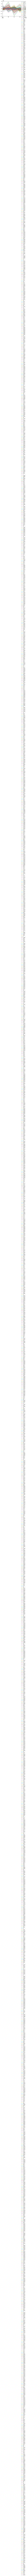

In [14]:
(quarterly_sum_sales.T + 0.001).pct_change().diff().iloc[2:,:].plot()

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
(quarterly_sum_sales+ 0.001)

,2004-09-30,2004-12-31,2005-03-31,2005-06-30,2005-09-30,2005-12-30,2006-03-31
2319,55.091,21.381,55.851,172.471,334.601,117.891,54.951
243,794.031,801.611,827.581,1015.811,934.941,1022.761,789.951
707,2084.581,2282.461,2534.151,2300.521,2192.681,2217.741,1663.761
329,332.111,317.251,422.911,310.931,466.281,659.831,453.391
1029,1707.321,1454.821,1420.101,1606.311,1546.381,1505.171,917.411
...,...,...,...,...,...,...,...
2409,92.251,244.511,0.001,0.001,77.781,0.001,69.131
954,284.441,321.141,385.741,217.631,322.431,396.751,188.231
650,89.471,348.651,190.051,146.831,153.561,10.451,59.271
272,368.381,0.001,0.001,0.001,0.001,0.001,0.001


In [17]:
model = AgglomerativeClustering(n_clusters=5)

# model.fit()

results = model.fit_predict((quarterly_sum_sales))
results

array([4, 3, 0, ..., 4, 4, 4], dtype=int64)

In [18]:
quarterly_sum_sales['agg.cluster.labels'] = results
quarterly_sum_sales

,2004-09-30 00:00:00,2004-12-31 00:00:00,2005-03-31 00:00:00,2005-06-30 00:00:00,2005-09-30 00:00:00,2005-12-30 00:00:00,2006-03-31 00:00:00,agg.cluster.labels
2319,55.09,21.38,55.85,172.47,334.60,117.89,54.95,4
243,794.03,801.61,827.58,1015.81,934.94,1022.76,789.95,3
707,2084.58,2282.46,2534.15,2300.52,2192.68,2217.74,1663.76,0
329,332.11,317.25,422.91,310.93,466.28,659.83,453.39,2
1029,1707.32,1454.82,1420.10,1606.31,1546.38,1505.17,917.41,0
...,...,...,...,...,...,...,...,...
2409,92.25,244.51,0.00,0.00,77.78,0.00,69.13,4
954,284.44,321.14,385.74,217.63,322.43,396.75,188.23,2
650,89.47,348.65,190.05,146.83,153.56,10.45,59.27,4
272,368.38,0.00,0.00,0.00,0.00,0.00,0.00,4


In [19]:
print(quarterly_sum_sales['agg.cluster.labels'].value_counts())

4    953
2    785
1    456
3    192
0     99
Name: agg.cluster.labels, dtype: int64


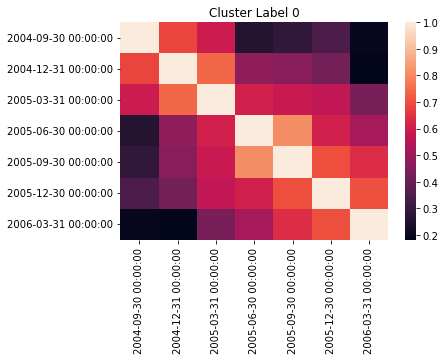

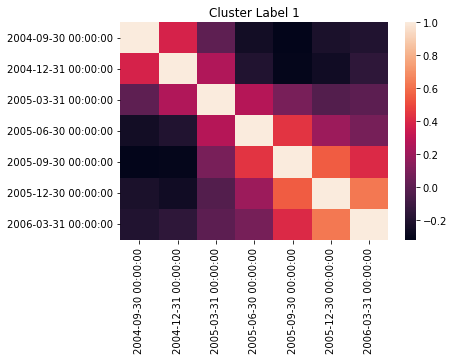

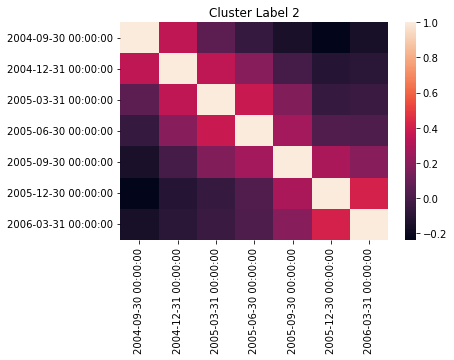

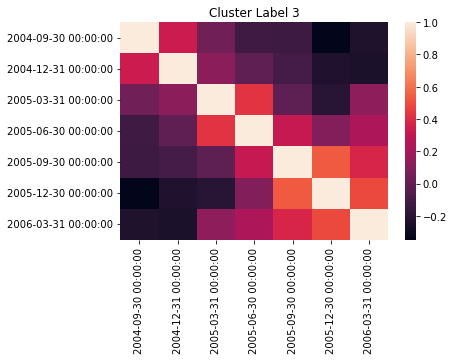

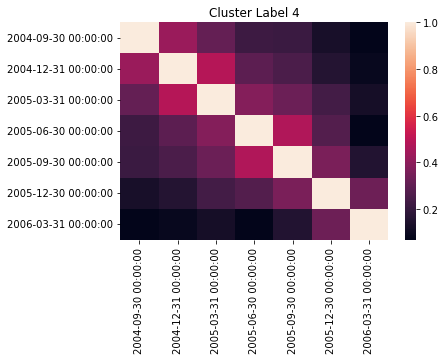

In [20]:
for x in range(0,5):
    sns.heatmap(quarterly_sum_sales[quarterly_sum_sales['agg.cluster.labels']==x].drop('agg.cluster.labels', axis=1).corr())
    plt.title(f'Cluster Label {x}')
    plt.show()

In [21]:
for x in range(0, 5):
    print(x, '\n\n', quarterly_sum_sales[quarterly_sum_sales['agg.cluster.labels']==x].drop('agg.cluster.labels', axis=1).sum(axis=0))

0 

 2004-09-30    169327.99
2004-12-31    185887.28
2005-03-31    184583.21
2005-06-30    177782.40
2005-09-30    182580.69
2005-12-30    185806.39
2006-03-31    117600.75
dtype: float64
1 

 2004-09-30    287445.84
2004-12-31    314427.97
2005-03-31    291508.46
2005-06-30    307147.20
2005-09-30    289657.37
2005-12-30    293414.24
2006-03-31    185539.02
dtype: float64
2 

 2004-09-30    224321.20
2004-12-31    222353.35
2005-03-31    249259.61
2005-06-30    248989.50
2005-09-30    270932.89
2005-12-30    309533.60
2006-03-31    213729.28
dtype: float64
3 

 2004-09-30    171222.04
2004-12-31    209830.27
2005-03-31    210031.88
2005-06-30    221404.49
2005-09-30    206350.95
2005-12-30    213797.60
2006-03-31    143616.77
dtype: float64
4 

 2004-09-30    115664.74
2004-12-31     97500.75
2005-03-31     87433.48
2005-06-30     87430.53
2005-09-30     89739.39
2005-12-30     88422.21
2006-03-31     70858.40
dtype: float64


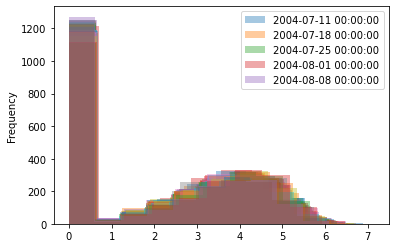

In [22]:

def plot_sales_matrix(sum_sales_matrix):
    [[np.log(matrix[col]+1).plot(kind='hist', alpha=0.4, label=f'{col}') for col in matrix] for matrix in [sum_sales_matrix]]
    plt.legend(labels=[col for col in sum_sales_matrix][:5])
    plt.show() # non-log

plot_sales_matrix(weekly_sum_sales)

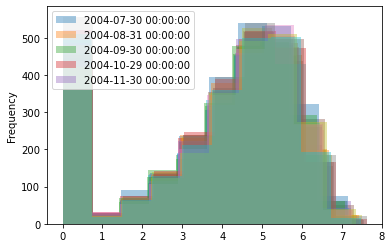

In [23]:
plot_sales_matrix(monthly_sum_sales)

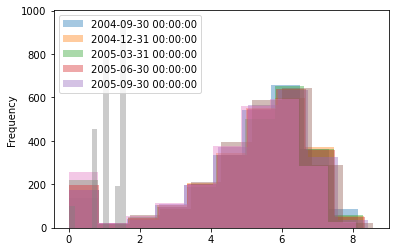

In [24]:
plot_sales_matrix(quarterly_sum_sales)

The above is the histogram of log-transformed sales for all households in the data;
    over weekly, monthly and quarterly frequencies. This may not be the best way to approach the weekly time period; if that is where we're getting most of our true 0 values.
    

Another thought would be to use rolling windows of these values, in order to smooth over any bad boundary anomalies.

Check twice about nulls in the resample calculation --


In [25]:
row_1 = quarterly_sum_sales.iloc[0]#.T.plot(legend=False) # 2500 lines * 15 dots? plus handling nulls/00 values?

In [26]:
row_2 = quarterly_sum_sales.iloc[1]

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
cosine_similarity(quarterly_sum_sales).shape

(2485, 2485)

<AxesSubplot:>

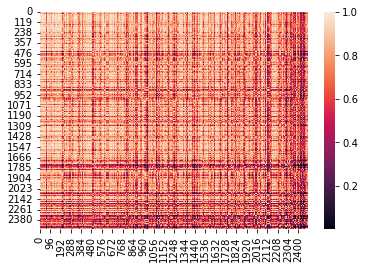

In [29]:
sns.heatmap(cosine_similarity(quarterly_sum_sales))

<AxesSubplot:>

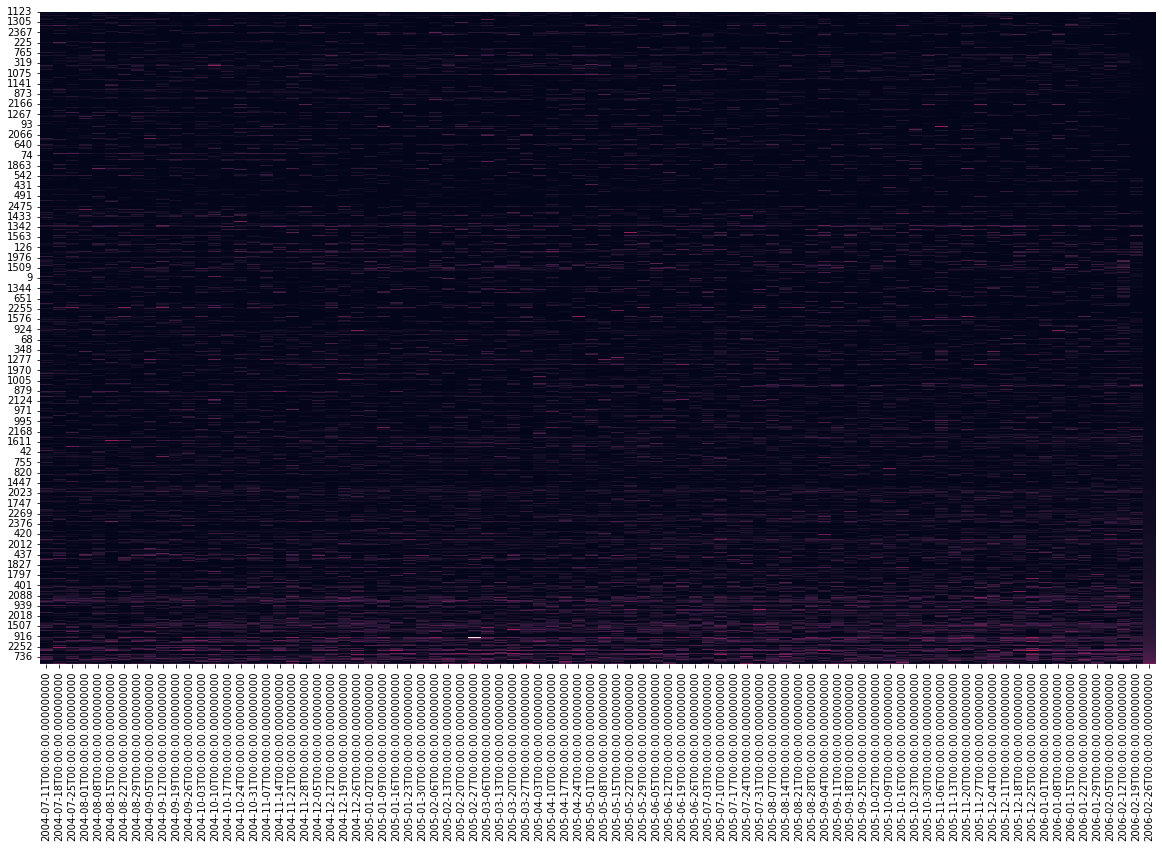

In [30]:
for col in weekly_sum_sales.columns:
    weekly_sum_sales.sort_values(col, inplace=True)

plt.figure(figsize=(20,12))
sns.heatmap(weekly_sum_sales, cbar=False)

In [31]:
sns.heatmap(weekly_sum_sales.T.diff().corr())

<AxesSubplot:>

Error in callback <function flush_figures at 0x0000020A509DE940> (for post_execute):


KeyboardInterrupt: 

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

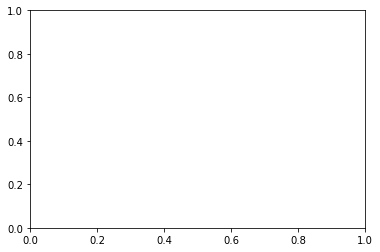

In [32]:
plt.subplots()

### Package Test

In [33]:
Merged = dtcj.load.Merged()

In [34]:
Merged

In [35]:
merged = Merged.df
merged.shape

(2380828, 19)

In [36]:
demo_only = Merged.demo_only()

demo_only.shape

(1320234, 19)

In [37]:
bq_sales = sales_over_time(Merged)

NameError: name 'sales_over_time' is not defined

In [ ]:
bq_sales

[np.log(bq_sales[col]+1).plot(kind='hist', alpha=0.4) for col in bq_sales]

bq_sales.isna().sum()

sns.heatmap(bq_sales.T.corr())

### LOWER LEVEL FUNCTIONS

In [ ]:
merged = dtcj.load_merged()

In [ ]:
clean_demo = dtcj.load_demo()

In [ ]:
dtcj.load_campaign_summary(merged)

In [ ]:
        
        ## load demographic data only  
        self.demo_ids = dtcj.demo_list( )       
        self.demo_only = self.df[self.df[customer_id].isin(self.demo_ids)]


In [ ]:


        

    def sales_over_time(self, 
                        resample_rule = 'BQ',
                        hh_keys=None
                           ):
        """return the sales series of `dt_col` resample sums for one or many `sales_col`; 
        for one or many given `customer_id`s
        
        
        
        I'd like to make this only work for the whole dataset. 
        and have different self.df/self.customer_ids stored in distinct table objects;
        One for merged, and one for merged demo. 
        
        By segmenting this way, I can produce timeseries by sample size and resample group
        such as to form a tensor/matrix of sales over time for various categories
        
        The similarity across matrices will then represent purchase behaviour. 
        
        We could additionally provide RFM attributes or other variables over time to add depth to our matrix of timeseries points;
            -> errors with churn, customer acquisition
        
        This would provide an accurate representation of **purchase behaviour over time**, such as noticeable by our data...
        
        We don't need to use deep learning to compare these behaviours against direct marketing campaigns
                -> we are not investigating whether customers knew about the sales -->
                    -> we have a small sample group of targeted households, is their behaviour noticeably affected
                        -> versus a control group of similar-purchasing-households? similar demographics?
                        
        
        """
        # allow list-based filtering...
        if hh_keys!=None:
            hh_keys = hh_keys
        else:
            hh_keys = self.customer_ids
            
            
        ## record fails and outputs
        idx = []
        output = pd.DataFrame()
        for hh in hh_keys:
            idx.append(hh)
            try:
                output=output.append(self.df[self.df[self.customer_id]==hh].resample(resample_rule, on=self.dt_col)[self.sales_col].sum(), ignore_index=True)
            except:
                fails.append(hh)
                pass

    #     assert all(hh_keys == list(output.index)) ## what a terrible assertion dude..don't pass thru constructor

        output.index = idx
#         output.fillna(0, inplace=True) ### these nulls indicate non-existent household??
                                        ### there are other 0's in the data, between full columns.
        
        return output
    
    

In [ ]:
    @property    
    def demo_only(self):
        ''' ## FILTERING FOR DEMO HOUSEHOLDS ONLY '''
        return self.df[self.df['household_key'].isin(self.demo_list)]



    def sales_over_time(self, 
                            resample_rule = 'BQ',
                           ):
        '''return the sales series of `dt_col` resample sums for one or many `sales_col`; for one or many given `customer_id`s'''
        df = self.df
        customer_id=self.customer_id
        dt_col = self.dt_col
        sales_cols = self.sales_col
        hh_keys = list(self.df[customer_id].unique())

    #     print(type(hh_keys))
        ####
        fails = []
        output = pd.DataFrame()
        for hh in hh_keys:
            try:
                output=output.append(df[df[customer_id]==hh].resample(resample_rule, on=dt_col)[sales_cols].sum(), ignore_index=True)
            except:
                fails.append(hh)
                pass

    #     assert all(hh_keys == list(output.index)) ## what..don't pass thru constructor?
        if len(fails)>1:
            output.index = hh_keys ### SILENT ERROR
        return output
    #             .agg(**{x:'sum' for x in sales_cols}) ### ADD HOUSEHOLD KEY


        
#         self.df.resample(resample_rule, on=dt_col).groupby('household_key')